In [82]:
import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(np.power(10,-3),np.power(10,6),1000000)
plt.loglog(a, np.power(10,-0.7)*np.power(a,-2), basex=10)
plt.grid(True)
plt.xlabel('log($a$/nm)')
plt.ylabel('log($v_{min}/$(m/s))')
plt.show()

ValueError: Integers to negative integer powers are not allowed.

# Numerical calculation for the relative efficiency drop
## Definition of variables $f\equiv log(\tau/t_c)$, $g\equiv \tau/t_p$

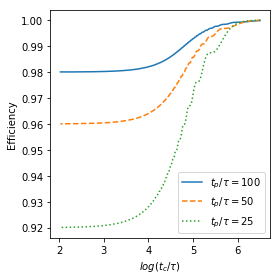

In [132]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

f = np.linspace(-6.5,-2.03,1000)
fig2, ax = plt.subplots(figsize=(4,4))

g = 1./100
y=0
for n in range(1, 10000):
    term = np.power(np.sin(n*np.pi/g*np.power(10,f)),2) / (1+4*np.pi*np.pi*n*n*np.power(10,2*f))
    y = y+term
y = 16*np.power(10,f)*g*y
ax.plot(-f,1-y,label="$t_p/\\tau =100$")

g = 1./50
y=0
for n in range(1, 10000):
    term = np.power(np.sin(n*np.pi/g*np.power(10,f)),2) / (1+4*np.pi*np.pi*n*n*np.power(10,2*f))
    y = y+term
y = 16*np.power(10,f)*g*y
ax.plot(-f,1-y,label="$t_p/\\tau =50$",linestyle='--')

g = 1./25
y=0
for n in range(1, 10000):
    term = np.power(np.sin(n*np.pi/g*np.power(10,f)),2) / (1+4*np.pi*np.pi*n*n*np.power(10,2*f))
    y = y+term
y = 16*np.power(10,f)*g*y
ax.plot(-f,1-y,label="$t_p/\\tau =25$",linestyle=':')

ax.set_xlabel("$log(t_c/\\tau)$")
ax.set_ylabel("Efficiency")
ax.legend(loc='lower right')

plt.tight_layout()
fig2.savefig('Fig2.pdf',format='pdf', dpi=2400)

# Numerical calculation for $\frac{3\Delta D}{v_0^2\tau}$ as a function of $t_p/\tau$, while $t_c/\tau$ is fixed to be the value in the enzyme data table
## Definition of variables $a\equiv \tau/t_c$, $b\equiv log(\tau/t_p)$

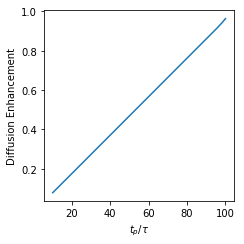

In [128]:
fig1, ax = plt.subplots(figsize=(3.5,3.5))

a = np.power(10,-2.01) 
b = np.linspace(-1,-2,1000)
y= a*a/np.power(10,2*b)
for n in range(1, 10000):
    term = 2*np.sin(n*np.pi*a*np.power(10,-b))*np.sin(n*np.pi*a*np.power(10,-b)) / (n*n*np.pi*np.pi + 4*np.power(n,4)*4*np.power(np.pi,4)*a*a)
    y = y+term
ax.plot(np.power(10,-b),y)
ax.set_xlabel("$t_p / \\tau$")
ax.set_ylabel("Diffusion Enhancement")
plt.tight_layout()
fig1.savefig('Fig1.pdf',format='pdf', dpi=2400)